Binomial tree is a graphical representation of possible intrinsic
values that an option may take at different nodes or time periods, whose value of option depends on the underlying stock or bond, and the value of the option at any node depends on the probability that the price of the underlying asset will either increase or descrease at any give node.

It has a downside- an asset can only be worth exaclty one of the two possible values, which is not quite a realistic measure to predict.

For example, 
Stock A price = $100
Option Strike Price = $100
Expiration Date = 1 year
R(interest rate) = 5%

At the end of the year,
probablity of stock rising to $125 = 50%
probablity of stock dropping to $90 = 50%
If stock rises, value of option = $125(current) - $100(option strike price)

Hence, the option value will be

Option value = [(probablity of rise* up value) + probablity of drop*down value) / (1 + R)] 

Option value = (0.50*25)+(0.50*10)/(1+0.05) = $16.66

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#parameters
#mean
mu = 0.1
#volatility
sigma = 0.15
#starting price
S0 = 1
#no. of simulations
N = 10000
#time horizon
T = [21.0/252, 1.0]
#time step
step = 1.0/252


In [3]:
#compute state price and probability 
#up state price
u = np.exp(sigma * np.sqrt(step))
#down state price
d = 1.0/u
#prob of up state
p = 0.5 + 0.5* (mu/sigma) * np.sqrt(step)

In [5]:
#binomial tree
up_times = np.zeros((N,len(T)))
down_times = np.zeros((N,len(T)))
for idx in range(len(T)):
    up_times[:,idx] = np.random.binomial(T[idx]/step, p , N)
    down_times[:,idx] = T[idx]/step - up_times[:,idx]


In [6]:
#terminal price
ST = S0 * u **up_times * d**down_times

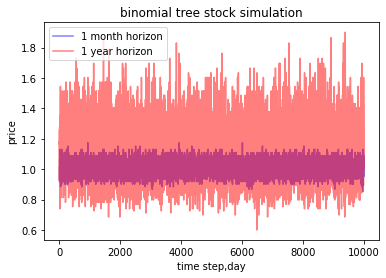

In [15]:
#visualisation
import matplotlib.pyplot as plt
plt.figure()
plt.plot(ST[:,0], color = 'b', alpha = 0.5, label= '1 month horizon')
plt.plot(ST[:,1], color = 'r', alpha= 0.5, label='1 year horizon')
plt.xlabel('time step,day')
plt.ylabel('price')
plt.title('binomial tree stock simulation')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.hist(ST[:,0], color = 'b', alpha = 0.5, label = '1 month horizon')
plt.hist(ST[:,1], color= 'r', alpha=0.5, label = '1 year horizon')
plt.xlabel('price')
plt.ylabel('count')
plt.title('binomial tree stock simulation')
plt.legend()
plt.show()